<img style="float:left" width="70%" src="pics/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="15%" src="pics/PythonLogo.svg">
<br style="clear:both;">

<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">Histogramas</h2>


## PARTE II: Transformaciones no lineales. Transformación *potencial*

## Docente

#### Autor: Pedro Latorre Carmona

Curso 2025-2026

Versión 1.0

---

## Enunciado de la práctica

En esta práctica, vamos a ver el efecto que tiene una transformación de tipo **potencial**, y, por tanto, de tipo no lineal, en una imagen en escala de grises. Las transformaciónes potenciales son del tipo:

$p^{'}(x,y) = C\times[p(x,y)]^{\gamma}$

<img src="pics/PotentialTransform.png">

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure
from skimage.util import img_as_float, img_as_ubyte

%matplotlib inline

In [3]:
def plot_analysis(image_orig, image_transformed, title_orig, title_transformed, gamma_val):
    """
    Muestra la imagen original y la transformada, junto con sus histogramas.
    """
    # Convertir a flotante (0-1) para mostrar y a 8-bits (0-255) para el histograma
    img_orig_float = img_as_float(image_orig)
    img_trans_float = img_as_float(image_transformed)
    
    img_orig_ubyte = img_as_ubyte(image_orig)
    img_trans_ubyte = img_as_ubyte(image_transformed)

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    ax = axes.ravel()

    # --- Imagen Original ---
    ax[0].imshow(img_orig_float, cmap='gray', vmin=0, vmax=1)
    ax[0].set_title(title_orig)
    ax[0].axis('off')

    # --- Histograma Original ---
    hist_orig, bins_center_orig = exposure.histogram(img_orig_ubyte, nbins=256)
    ax[1].plot(bins_center_orig, hist_orig, lw=2)
    ax[1].set_title(f'Histograma - {title_orig}')
    ax[1].set_xlabel('Nivel de Gris (0-255)')
    ax[1].set_ylabel('Nº de Píxeles')
    ax[1].axvline(img_orig_ubyte.mean(), color='red', ls='--', label=f'Media: {img_orig_ubyte.mean():.2f}')
    ax[1].legend(loc='upper right')
    ax[1].set_xlim(0, 255)

    # --- Imagen Transformada ---
    ax[2].imshow(img_trans_float, cmap='gray', vmin=0, vmax=1)
    ax[2].set_title(f'{title_transformed} (Gamma = {gamma_val})')
    ax[2].axis('off')

    # --- Histograma Transformado ---
    hist_trans, bins_center_trans = exposure.histogram(img_trans_ubyte, nbins=256)
    ax[3].plot(bins_center_trans, hist_trans, lw=2)
    ax[3].set_title(f'Histograma - {title_transformed}')
    ax[3].set_xlabel('Nivel de Gris (0-255)')
    ax[3].set_ylabel('Nº de Píxeles')
    ax[3].axvline(img_trans_ubyte.mean(), color='red', ls='--', label=f'Media: {img_trans_ubyte.mean():.2f}')
    ax[3].legend(loc='upper right')
    ax[3].set_xlim(0, 255)

    fig.suptitle(f'Análisis de Transformación Potencial (Gamma = {gamma_val})', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

## 1. Función de Análisis

Uno de los objetivos de la práctica es "Analizar/Entender la distribución en escala de grises". Para hacer esto de forma eficiente, creamos una función auxiliar `plot_analysis`.

Esta función automatiza el proceso de visualización para cualquier imagen que le pasemos. Sus tareas son:

1.  **Crear una figura** con 4 sub-gráficos (2x2) para mostrar una comparativa completa.
2.  **Mostrar la imagen original** (`image_orig`) en la esquina superior izquierda.
3.  **Calcular y mostrar el histograma** de la imagen original a su derecha. Este paso es **fundamental** para el análisis: nos permite ver visualmente dónde se concentran los niveles de gris (en sombras, medios tonos o luces).
4.  **Mostrar la imagen transformada** (`image_transformed`) en la esquina inferior izquierda.
5.  **Calcular y mostrar el histograma** de la imagen transformada a su derecha.

Al comparar el histograma original con el transformado, podemos **validar cuantitativamente** si nuestra transformación ha logrado el objetivo de "estirar" el histograma y mejorar el contraste. También añadimos la media del nivel de gris como una línea vertical para una referencia rápida.

In [4]:
# --- 0. Definición de Rutas de Archivos ---
path_img_1 = "ImageMicroscopy-I.png"
path_img_2 = "ImageMicroscopy-II.png"


img1 = io.imread(path_img_1)
img2 = io.imread(path_img_2)

## 2. Fundamento Teórico: La Transformación Potencial (Corrección Gamma)

Antes de aplicar la transformación, es crucial entender su naturaleza matemática y por qué es tan efectiva.

La transformación potencial se define por la ley de potencia:

$s = C \times r^{\gamma}$

Donde:
* $r$ es el valor del píxel de entrada (original).
* $s$ es el valor del píxel de salida (transformado).
* $\gamma$ (gamma) es el exponente que define la transformación.
* $C$ es una constante de escalado.

### Naturaleza Matemática 

Para el análisis matemático, normalizamos los valores de los píxeles al rango $[0.0, 1.0]$. Esto simplifica la fórmula, ya que $C$ se convierte en 1 (porque $1^\gamma$ sigue siendo 1, manteniendo el rango de salida). La fórmula que realmente aplicamos es:

$s = r^{\gamma}$   (con $r, s \in [0, 1]$)

Esta es una **transformación no lineal**. A diferencia de una transformación lineal (como $s = a \cdot r + b$, que aplica el *mismo* factor de escala y desplazamiento a *todos* los píxeles), la transformación gamma altera los píxeles de forma diferente según su valor original.

Analicemos la función $f(r) = r^\gamma$:

1.  **Caso $\gamma = 1$**: Tenemos $s = r^1$. La salida es idéntica a la entrada. Es una línea recta (la identidad) y la imagen no sufre cambios.

2.  **Caso $\gamma < 1$ (ej: 0.4)**: La función (como $f(r) = \sqrt{r}$) es **cóncava hacia abajo**. Esto significa que "levanta" los valores. Un valor de entrada oscuro (ej: $r=0.1$) sufre un gran incremento ($s = 0.1^{0.4} \approx 0.4$). Un valor de entrada claro (ej: $r=0.9$) sufre un incremento menor.
    * **Resultado Práctico**: Esta transformación **expande el rango dinámico de las sombras** (los valores oscuros se separan más entre sí) a costa de comprimir el rango de las luces. Es la herramienta perfecta para **imágenes oscuras (subexpuestas)**, ya que ilumina la imagen y revela detalles en las zonas oscuras.

3.  **Caso $\gamma > 1$ (ej: 2.5)**: La función (como $f(r) = r^2$) es **cóncava hacia arriba**. Esto "hunde" los valores. Un valor de entrada oscuro (ej: $r=0.1$) apenas cambia ($s = 0.1^{2.5} \approx 0.003$). Un valor de entrada claro (ej: $r=0.8$) sufre una reducción significativa ($s = 0.8^{2.5} \approx 0.57$).
    * **Resultado Práctico**: Esta transformación **expande el rango dinámico de las luces** (los valores claros se separan más entre sí) a costa de comprimir las sombras. Es la herramienta idónea para **imágenes brillantes (sobreexpuestas o "lavadas")**, ya que oscurece la imagen y recupera contraste en las zonas "quemadas".

La librería `skimage` gestiona por nosotros la conversión a `float` (rango 0-1), la aplicación de $s = r^\gamma$, y la conversión de vuelta a `ubyte` (rango 0-255), asegurando que el proceso sea matemáticamente correcto.


--- Análisis de ImageMicroscopy-I.png ---


c:\Users\fpabl\anaconda3\envs\Practica_2_env\lib\site-packages\skimage\_shared\utils.py:316: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


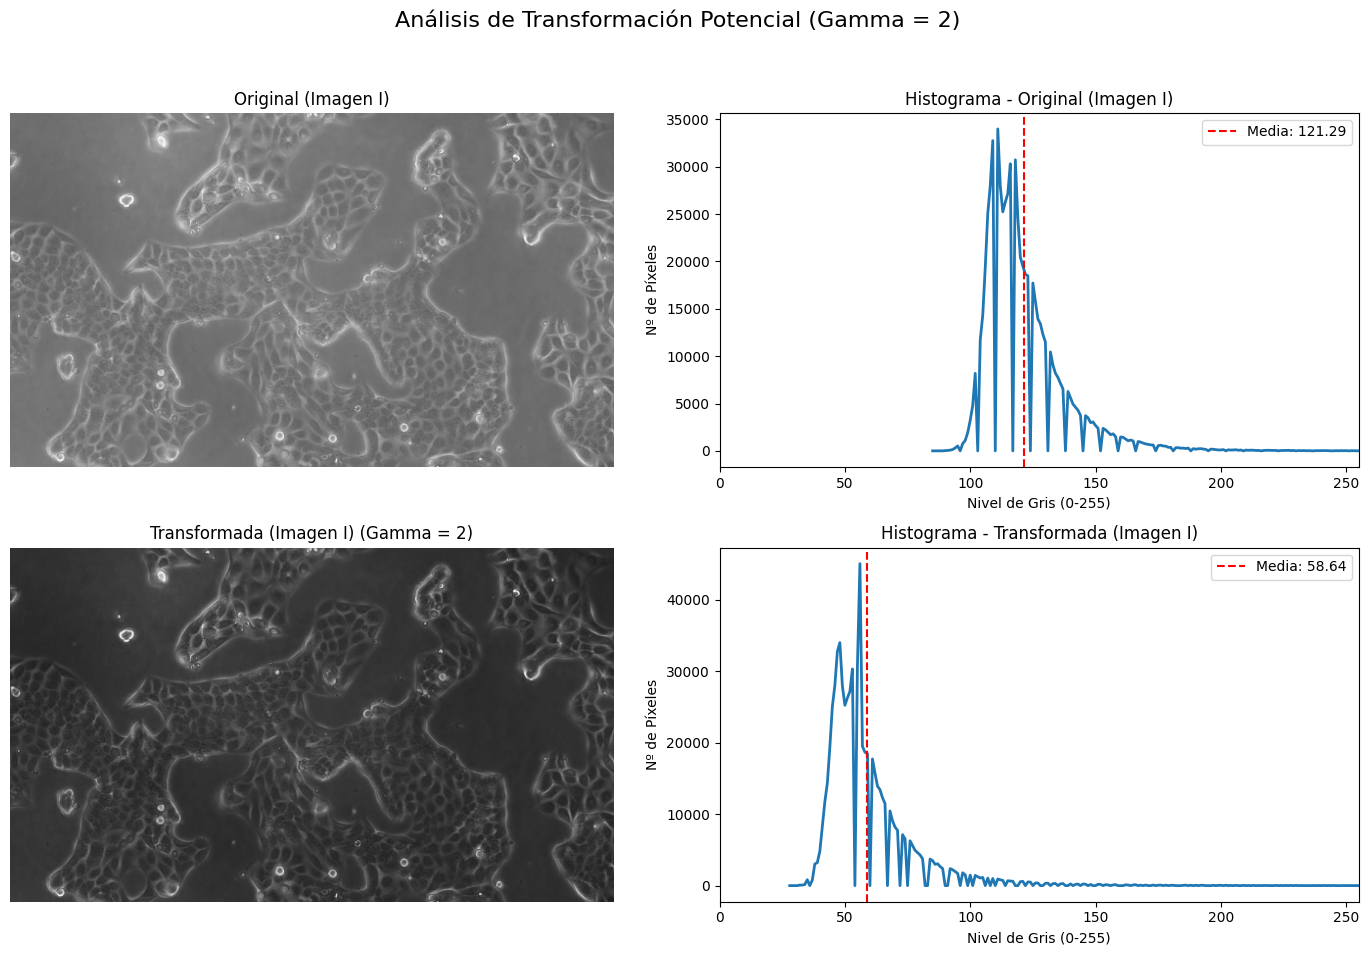

In [5]:
# --- 2. ANÁLISIS Y TRANSFORMACIÓN DE IMAGEMICROSCOPY-I.PNG ---

# 1. Análisis: Imagen muy brillante (sobreexpuesta).
# 2. Reflexión: Necesitamos un gamma > 1 para oscurecerla y ganar contraste.
gamma_1 = 2

# 3. Aplicación: Usamos exposure.adjust_gamma de skimage
# Esta función maneja internamente la normalización (0-1) y el escalado.
img1_transformed = exposure.adjust_gamma(img1, gamma=gamma_1)

# 4. Analizar y Concluir
print("\n--- Análisis de ImageMicroscopy-I.png ---")
plot_analysis(img1, img1_transformed, "Original (Imagen I)", "Transformada (Imagen I)", gamma_1)



### Análisis y Resultados: `ImageMicroscopy-I.png`

**1. Análisis (Objetivo 1):**
La imagen `ImageMicroscopy-I.png` es visiblemente brillante y de bajo contraste. Las estructuras celulares apenas se distinguen, apareciendo "lavadas". El histograma original confirma este análisis: la gran mayoría de los píxeles están agrupados en el extremo derecho del histograma (valores de gris altos, cercanos a 255). Hay muy poca información en los tonos medios y oscuros.

**2. Reflexión y Elección de $\gamma$ (Objetivo 2):**
Dado que la imagen está sobreexpuesta, nuestro objetivo es oscurecerla y, más importante, **expandir el contraste en las zonas claras**.
Basándonos en el análisis matemático anterior, esto requiere una transformación con un **$\gamma > 1$**.
Elegimos un valor de `gamma = 2`. Este valor "hundirá" los valores de los píxeles, mapeando el gran cúmulo de píxeles claros (ej: 220-250) a un rango más amplio de tonos medios y oscuros, revelando así su textura.

**3. Aplicación y Conclusión (Objetivos 3 y 4):**
Tras aplicar `exposure.adjust_gamma(img1, gamma=2)`, el resultado es el esperado. La imagen transformada es más oscura, pero el contraste ha mejorado drásticamente. Las membranas y núcleos celulares, antes indistinguibles, ahora son claramente visibles.
El histograma resultante lo corrobora: el pico de la derecha se ha "estirado" hacia la izquierda, ocupando ahora los tonos medios del histograma y utilizando mucho mejor el rango dinámico disponible.


--- Análisis de ImageMicroscopy-II.png ---


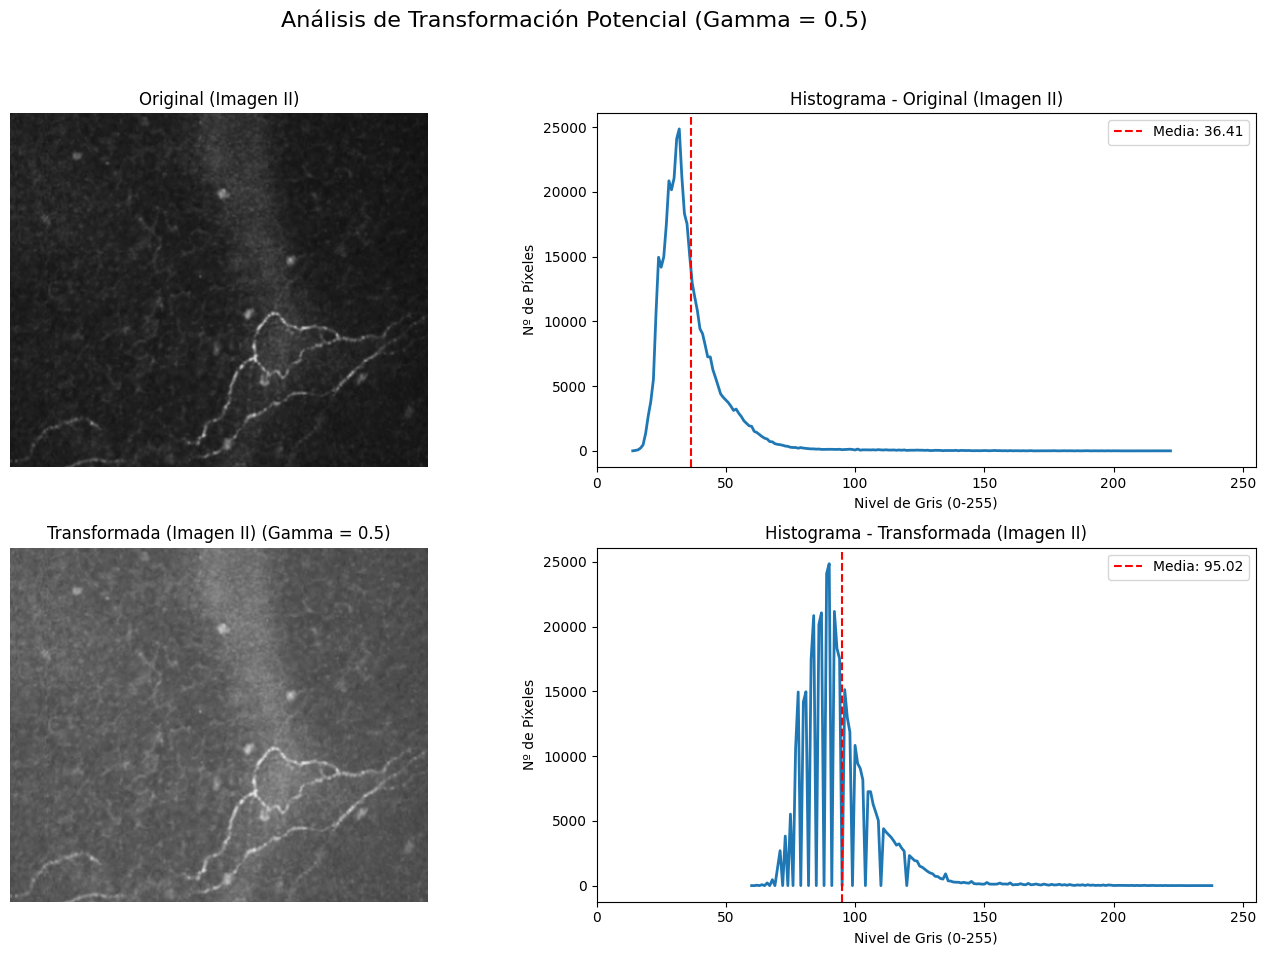

In [8]:
# --- 3. ANÁLISIS Y TRANSFORMACIÓN DE IMAGEMICROSCOPY-II.PNG ---

# 1. Análisis: Imagen muy oscura (subexpuesta).
# 2. Reflexión: Necesitamos un gamma < 1 para aclararla y revelar detalles en sombras.
gamma_2 = 0.5

# 3. Aplicación:
img2_transformed = exposure.adjust_gamma(img2, gamma=gamma_2)

# 4. Analizar y Concluir
print("\n--- Análisis de ImageMicroscopy-II.png ---")
plot_analysis(img2, img2_transformed, "Original (Imagen II)", "Transformada (Imagen II)", gamma_2)

### Análisis y Resultados: `ImageMicroscopy-II.png`

**1. Análisis (Objetivo 1):**
Esta imagen es el caso opuesto. Es extremadamente oscura (subexpuesta). A simple vista, es casi imposible discernir ningún detalle, salvo unas pocas estructuras filamentosas muy tenues. El histograma original es contundente: prácticamente todos los píxeles están "aplastados" en el extremo izquierdo del histograma (valores de gris muy bajos, cercanos a 0).

**2. Reflexión y Elección de $\gamma$ (Objetivo 2):**
Para corregir esta imagen, necesitamos aclararla y **expandir el contraste en las zonas oscuras**.
La teoría matemática nos dice que para "levantar" los valores oscuros y separarlos entre sí, necesitamos aplicar una transformación con un **$\gamma < 1$**.
Elegimos un valor de `gamma = 0.5`. Este valor aplicará una gran ganancia a los píxeles oscuros (ej: 10-30) y una ganancia menor a los pocos píxeles que ya eran algo más claros, revelando la información oculta en las sombras.

**3. Aplicación y Conclusión (Objetivos 3 y 4):**
El resultado de `exposure.adjust_gamma(img2, gamma=0.5)` es notable. La imagen transformada revela una compleja red de estructuras que eran completamente invisibles en la original.
El histograma de salida muestra cómo el pico de la izquierda se ha "estirado" exitosamente hacia la derecha, repartiendo los píxeles por todo el espectro de grises. Esto demuestra que la información estaba presente en la imagen original, pero comprimida en un rango dinámico demasiado pequeño para ser percibida.

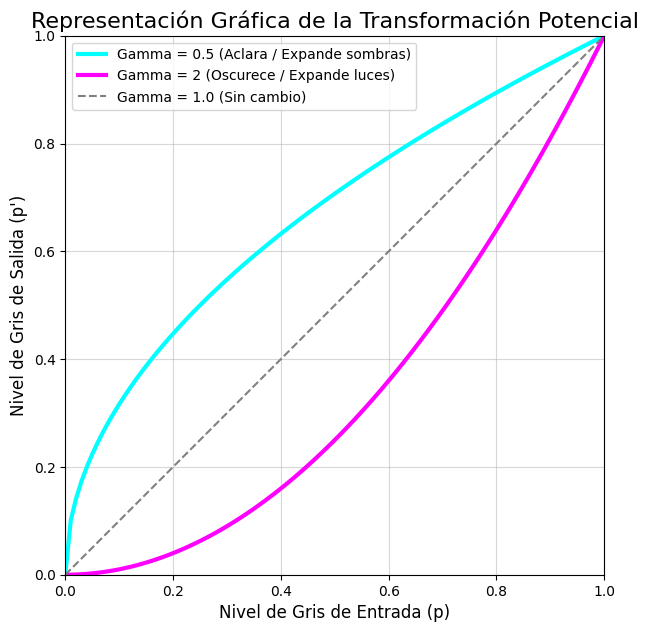

In [10]:
# --- 4. COMPROBACIÓN GRÁFICA DE LAS CURVAS ---

# Creamos un array de valores de entrada (píxeles) de 0 a 1
# (Representa los niveles de gris normalizados)
x_in = np.linspace(0, 1, 100)

# Calculamos las transformaciones para los gamma que usamos
y_gamma_0_4 = x_in ** 0.5  # Para la imagen oscura
y_gamma_2_5 = x_in ** 2  # Para la imagen brillante
y_gamma_1_0 = x_in ** 1.0  # La línea base (sin cambios)

# Graficamos
plt.figure(figsize=(10, 7))
plt.plot(x_in, y_gamma_0_4, label=f'Gamma = 0.5 (Aclara / Expande sombras)', color='cyan', lw=3)
plt.plot(x_in, y_gamma_2_5, label=f'Gamma = 2 (Oscurece / Expande luces)', color='magenta', lw=3)
plt.plot(x_in, y_gamma_1_0, label='Gamma = 1.0 (Sin cambio)', color='gray', linestyle='--')

# Configuramos la gráfica
plt.title('Representación Gráfica de la Transformación Potencial', fontsize=16)
plt.xlabel('Nivel de Gris de Entrada (p)', fontsize=12)
plt.ylabel('Nivel de Gris de Salida (p\')', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.5)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box') # Hago la gráfica cuadrada
plt.show()

## 4. Comprobación Gráfica y Conclusión Final

Esta gráfica es la **comprobación visual de nuestra reflexión matemática**.

* **Curva Magenta ($\gamma=2$):** Esta es la curva que aplicamos a la Imagen I. Podemos ver cómo es cóncava hacia arriba. Para un píxel de entrada claro (ej: `Input = 0.8`), el valor de salida es mucho más bajo (`Output ≈ 0.57`). Esto "oscurece" los tonos claros y los "estira", aumentando su contraste.
* **Curva Cyan ($\gamma=0.5$):** Esta es la curva que aplicamos a la Imagen II. Es cóncava hacia abajo. Para un píxel de entrada oscuro (ej: `Input = 0.2`), el valor de salida es mucho más alto (`Output ≈ 0.52`). Esto "ilumina" los tonos oscuros y los "estira", revelando el detalle en las sombras.
* **Línea Gris ($\gamma=1.0$):** Representa la no-transformación ($s=r$), donde la salida es igual a la entrada.

### Conclusión de la Práctica

Esta práctica sirve para ver que la transformación potencial es una herramienta no lineal fundamental para el realce del contraste. A diferencia de un ajuste lineal de brillo, la corrección gamma permite **expandir selectivamente** el rango dinámico de las sombras (con $\gamma < 1$) o de las luces (con $\gamma > 1$).

Mediante el análisis previo del histograma de una imagen, podemos deducir la naturaleza del problema (subexpuesta o sobreexpuesta) y seleccionar un valor $\gamma$ adecuado para corregirlo, recuperando detalles que, aunque presentes en los datos, eran imperceptibles para el ojo humano.

## Objetivos

El objetivo de la práctica es:

1. Analizar/Entender la distribución en escala de grises de las imágenes **ImageMicroscopy-I.png** e **ImageMicroscopy-II.png**


2. Ver cuál será la forma de la mejor transformación potencial a aplciar a cada una de ellas.


3. Aplicarlas y ver el resultado.


4. Analizar y concluir.

no hace falta pedir al usuario el valo de gamma para calcular c pero si que hace falta comprobar que estamos haceindolo bien

comprobar la representacion gráfica de la curva exponencial

reflexionar porque aplicamos una transformacion u otra